<a href="https://colab.research.google.com/github/anikch/Image-denoising-using-convolutional-autoencoder/blob/main/Image_denoising_autoencoder_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement:

The dataset is similar to MNIST but includes images of specific clothing and accessory. The objective is to add some noise to the images and then  use    an Autoencoder to denoise them. 

Dataset Description: 

MNIST Fashion Dataset

•Total Images: 70,000

•Train Images: 60,000

•Test Images: 10,000

•Image Size:28 x 28

•Classes:‘T-Shirt/top’, ‘Trouser’, ‘Pullover’, ‘Dress’, ‘Coat’, ‘Sandal’, ‘Shirt’, ‘Sneaker’, ‘Bag’, ‘Ankle Boot’


In [15]:
# Importing required libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading and checking data

In [16]:
# Loading fashion_mnist dataset
(X_train, y_train), (X_test, y_test)= fashion_mnist.load_data()

# Checking shape of train test dataset
X_train.shape, X_test.shape, y_test.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (10000,), (10000,))

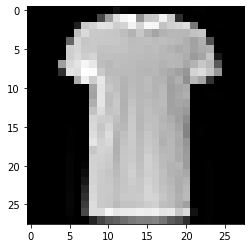

In [17]:
# Checking arbitary image
plt.imshow(X_train[17,:,:])

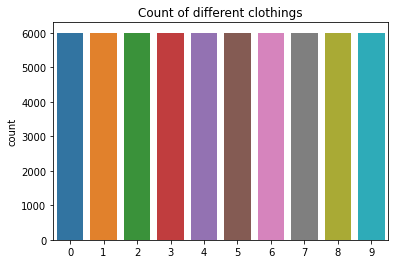

In [18]:
# Checking unique count of data in training dataset
sns.countplot(y_train)
plt.title('Count of different clothings')
plt.show()

# Data Pre-processing

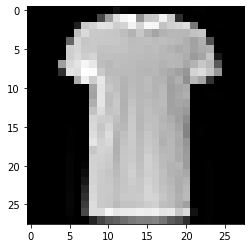

In [19]:
# Normalizing data
X_train= X_train.astype('float32') / 255.
X_test= X_test.astype('float32') / 255.
# Checking arbitary image
plt.imshow(X_train[17,:,:])

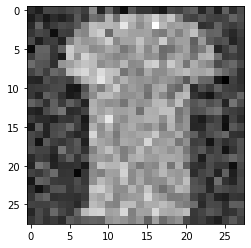

In [20]:
# Adding salt and pepper noise
noise_factor= .2
X_train_noisy= X_train + noise_factor * np.random.normal(loc= 0.0, scale= 1.0, size= X_train.shape)  
X_test_noisy= X_test + noise_factor * np.random.normal(loc= 0.0, scale= 1.0, size= X_test.shape)

# Checking arbitary image
plt.imshow(X_train_noisy[17,:,:])

In [21]:
# Changing shape
X_train_noisy= X_train_noisy.reshape(X_train.shape[0], 28, 28, 1)
X_test_noisy= X_test_noisy.reshape(X_test.shape[0], 28, 28, 1)

print(X_train_noisy.shape)
print(X_test_noisy.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [22]:
# Input layer
input_encoder= tf.keras.layers.Input(shape= (28,28, 1))

# Building Encoder
encoded= tf.keras.layers.Conv2D(64, (3, 3), activation= 'relu', padding= 'same')(input_encoder)
encoded= tf.keras.layers.MaxPool2D((2, 2), padding= 'same')(encoded)
encoded= tf.keras.layers.Conv2D(32, (3, 3), activation= 'relu', padding= 'same')(encoded)
encoded= tf.keras.layers.MaxPool2D((2, 2))(encoded)

# Building Decoder
decoded= tf.keras.layers.Conv2DTranspose(64, (3, 3), strides= 2, activation= 'relu', padding= 'same')(encoded)
decoded= tf.keras.layers.Conv2DTranspose(32, (3, 3), strides= 2, activation= 'relu', padding= 'same')(decoded)
decoded= tf.keras.layers.Conv2D(1, (3, 3), activation= 'sigmoid', padding= 'same')(decoded)

# Autoencoder
autoencoder= tf.keras.models.Model(input_encoder, decoded)

# summary
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 14, 14, 64)       1849

In [23]:
# Compiling model
autoencoder.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.001), loss= 'binary_crossentropy')

In [24]:
# creating callbacks
earlystopping= tf.keras.callbacks.EarlyStopping(monitor= 'val_loss', min_delta= .001, patience= 10, verbose= 1, mode= 'auto')
callbacks= [earlystopping]

In [25]:
# Training autoencoder using X_train
history= autoencoder.fit(X_train_noisy, X_train, epochs= 100, batch_size= 128, shuffle= True, validation_data= (X_test_noisy, X_test), callbacks= callbacks)

Epoch 1/100
469/469 [==============================] - 4s 8ms/step - loss: 0.3082 - val_loss: 0.2796
Epoch 2/100
469/469 [==============================] - 4s 8ms/step - loss: 0.2735 - val_loss: 0.2731
Epoch 3/100
469/469 [==============================] - 4s 8ms/step - loss: 0.2689 - val_loss: 0.2696
Epoch 4/100
469/469 [==============================] - 4s 8ms/step - loss: 0.2668 - val_loss: 0.2684
Epoch 5/100
469/469 [==============================] - 4s 8ms/step - loss: 0.2657 - val_loss: 0.2673
Epoch 6/100
469/469 [==============================] - 4s 8ms/step - loss: 0.2649 - val_loss: 0.2666
Epoch 7/100
469/469 [==============================] - 4s 8ms/step - loss: 0.2643 - val_loss: 0.2663
Epoch 8/100
469/469 [==============================] - 4s 8ms/step - loss: 0.2638 - val_loss: 0.2656
Epoch 9/100
469/469 [==============================] - 4s 8ms/step - loss: 0.2634 - val_loss: 0.2654
Epoch 10/100
469/469 [==============================] - 4s 8ms/step - loss: 0.2631 - val_lo

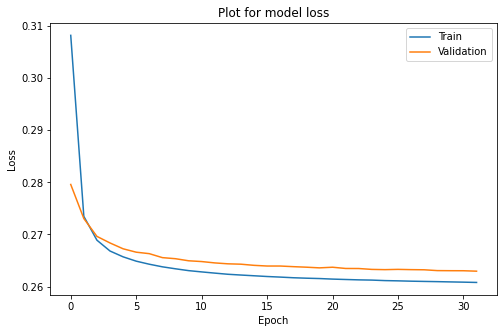

In [30]:
# Plotting loss for different epochs
plt.figure(figsize= [8,5])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Plot for model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [26]:
# Displays ten random images from each one of the supplied arrays.
def display(array1, array2):
    n = 10
    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

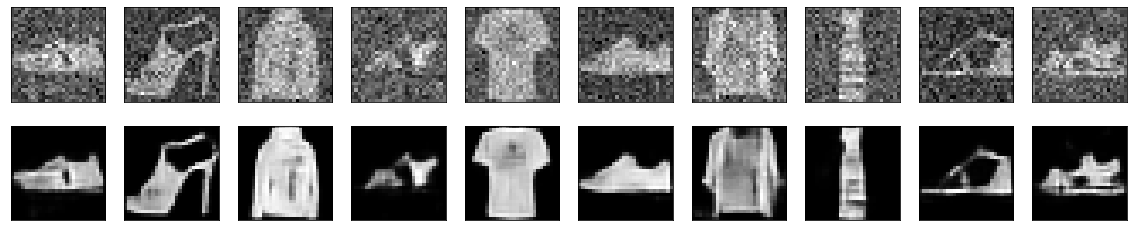

In [27]:
# Checking on training data
predictions= autoencoder.predict(X_train_noisy)
display(X_train_noisy, predictions)

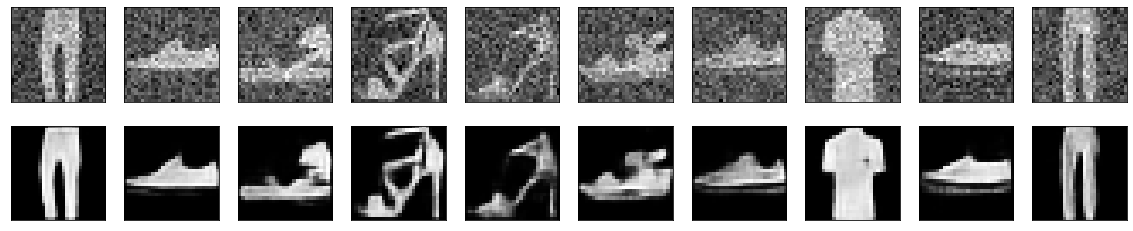

In [28]:
# Checking on testing data
predictions= autoencoder.predict(X_test_noisy)
display(X_test_noisy, predictions)

# Conclusion

- We have first Loaded the data nad vizualized it.
- Normalized the data and added salt and pepper noise.
- Vizualized the noisy image.
- Created out encoder and decoder architectures and created autoencoder model.
- Our input data shape is ( 28 x 28 x 1). I have used 2 Conv2D layers and 2 MaxPool2D in encoder. 2 Conv2DTranspose layers and 1 Conv2D layer in decoder.
- From model summary it can be seen that output shape for input and output is same (28, 28, 1)
- Compiled the model with 'Adam' as optimizer and binary_crossentropy as loss function.
- Trained the model with epochs= 100 and earlystopping (monitor= 'val_loss', min_delta= .001) callback.
- Our model trained for 24 epochs and stopped by early stopping.
- Created a function to see random 10 noisy images and autoencoder output of those noisy images.
- Checked random images from testing and testing dataset and denoising versions of those images from autoencoder.
- Autoencoder has done pretty good job.